# Demo for cpu_scheduling_compute

This work notebook demonstrate how to interface with the functions within the compute module. 

Details regarding the unique dictionary structure for each CPU scheduling algorithm is made clear.

In [3]:
from modules.compute import cpu_scheduling_compute
import matplotlib.pyplot as plt
import numpy as np 

## Functions 

In [5]:
#temp plotting to see results
plot_colors=['blue','green','red','pink','orange','yellow']
def plot_results(results):
    for row in results:
        centre=np.mean(row[1:3])
        width=row[2]-row[1]
        height=row[3]
        label=f'task {int(row[0])+1}'
        plt.bar(centre,height,width,label=label,color=plot_colors[int(row[0])])
    
    scaling=results[-1][2]/len(np.unique(results[:,0]))
    for index in np.unique(results[:,0]):
        index=int(index)
        plt.annotate(f'task{index+1}',[index*scaling,1.4],color=plot_colors[index])



    plt.grid()
    plt.xlim(-1,results[-1][2]+1)
    plt.ylim(0,1.5)
    plt.show()

## Demo usage of FCFS

In [6]:
task_info={"scheduling_algo":'first_come_first_serve',
           'release_time':[1,3,2,15,30],
           'wc_exec_time':[2,4,5,3,9]}

results,dict_info=cpu_scheduling_compute(task_info)

In [7]:
results

array([[ 0.,  1.,  3.,  1.],
       [ 2.,  3.,  8.,  1.],
       [ 1.,  8., 12.,  1.],
       [ 3., 15., 18.,  1.],
       [ 4., 30., 39.,  1.]])

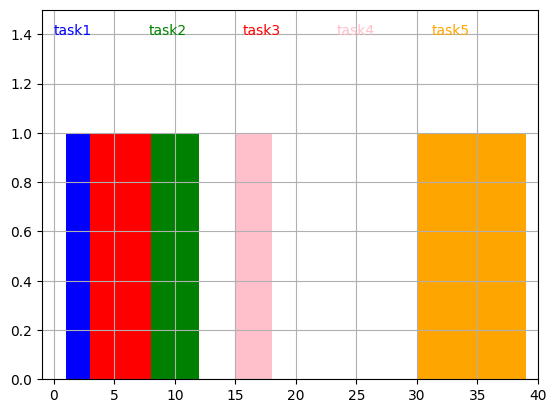

In [8]:
plot_results(results)

## Demo RM

In [9]:
task_info={"scheduling_algo":'rate_monotonic',
           "periods": np.array([8,5,10]),
           "wc_exec_time": np.array([1,2,2]),
           "end_time": 15}

computed_results,dict_info=cpu_scheduling_compute(task_info)

In [10]:
dict_info

{'schedulability': 'yes'}

In [11]:
computed_results

array([[ 1,  0,  2,  1],
       [ 0,  2,  3,  1],
       [ 2,  3,  5,  1],
       [ 1,  5,  7,  1],
       [ 0,  8,  9,  1],
       [ 1, 10, 12,  1],
       [ 2, 12, 14,  1]], dtype=int64)

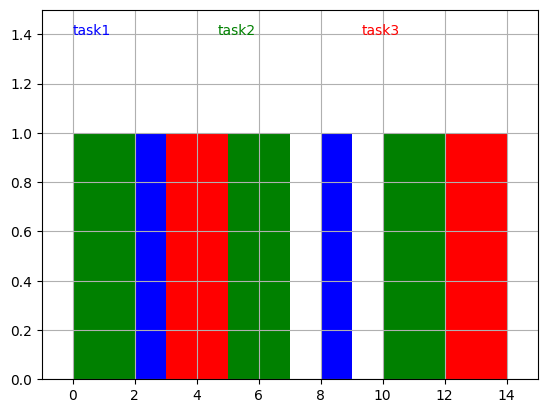

In [12]:
plot_results(computed_results)

## Demo usage of EDF

In [13]:
task_info={"scheduling_algo":'earliest_deadline_first',
           "periods": np.array([50,40,30]),
           "wc_exec_time": np.array([12,10,10]),
           "end_time": 120}

computed_results,dict_info=cpu_scheduling_compute(task_info)

In [14]:
dict_info

{'schedulability': 'yes'}

In [15]:
computed_results

array([[  2,   0,  10,   1],
       [  1,  10,  20,   1],
       [  0,  20,  32,   1],
       [  2,  32,  42,   1],
       [  1,  42,  52,   1],
       [  0,  52,  60,   1],
       [  2,  60,  70,   1],
       [  0,  70,  74,   1],
       [  1,  80,  90,   1],
       [  2,  90, 100,   1],
       [  0, 100, 112,   1]], dtype=int64)

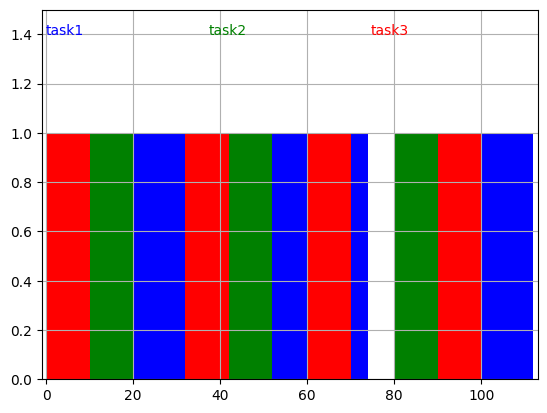

In [16]:
plot_results(computed_results)

## Demo usage Cycle Conserving EDF

In [17]:
#module 4 part 1
task_info={"scheduling_algo":'CycleEDF',
           "periods": np.array([8,10,14]),
           "wc_exec_time": np.array([3,3,1]),
           "invocations":[[2,1,1],
                          [1,1,1]]}

computed_results,dict_info=cpu_scheduling_compute(task_info)

In [18]:
dict_info

{'schedulability': 'yes'}

In [19]:
computed_results

array([[ 0.        ,  0.        ,  2.67942584,  0.74642857],
       [ 1.        ,  2.67942584,  4.28862124,  0.62142857],
       [ 2.        ,  4.28862124,  6.6615026 ,  0.42142857],
       [ 0.        ,  8.        ,  9.83006536,  0.54642857],
       [ 1.        , 10.        , 12.01438849,  0.49642857],
       [ 2.        , 14.        , 17.37349398,  0.29642857]])

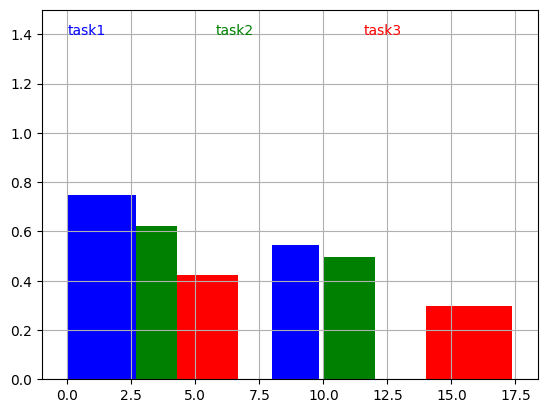

In [20]:
plot_results(computed_results)

In [18]:
#homework problem set 2 question 1 
task_info={"scheduling_algo":'CycleEDF',
           "periods": np.array([6,8,12]),
           "wc_exec_time": np.array([2,3,3]),
           "invocations":[[1,1,2],
                          [1,1,1]]}

computed_results,dict_info=cpu_scheduling_compute(task_info)

In [19]:
dict_info

{'schedulability': 'yes'}

In [20]:
computed_results

array([[ 0.        ,  0.        ,  1.04347826,  0.95833333],
       [ 1.        ,  1.04347826,  2.30663616,  0.79166667],
       [ 2.        ,  2.30663616,  5.99894385,  0.54166667],
       [ 0.        ,  6.        ,  7.6       ,  0.625     ],
       [ 1.        ,  8.        ,  9.41176471,  0.70833333],
       [ 2.        , 12.        , 13.84615385,  0.54166667]])

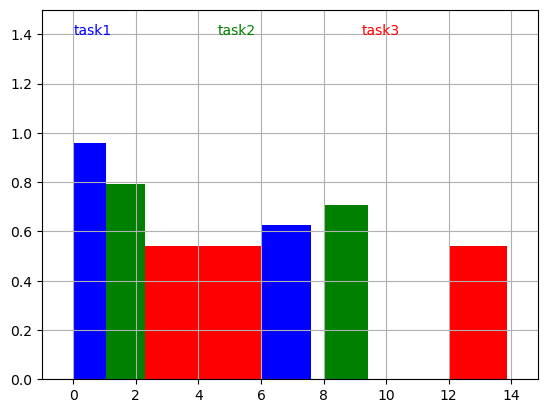

In [21]:
plot_results(computed_results)